In [1]:
import os

# Root path of your dataset
root_dir = "/kaggle/input/drone-detection"

# Get all file paths at once
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root_dir) for f in filenames]

# Count occurrences
drone_count = sum("drone" in f.lower() for f in all_files)
helicopter_count = sum("helicopter" in f.lower() for f in all_files)

print(f"Drone files: {drone_count}")
print(f"Helicopter files: {helicopter_count}")


Drone files: 48005
Helicopter files: 10092


In [2]:
import os

root_dir = "/kaggle/input/drone-detection"

total_files = 0
drone_count = 0
helicopter_count = 0

# Walk directories and count immediately
for dp, dn, filenames in os.walk(root_dir):
    for f in filenames:
        total_files += 1  # count every file
        if f.endswith(".txt"):  # only label files
            fname_lower = f.lower()
            if "drone" in fname_lower:
                drone_count += 1
            elif "helicopter" in fname_lower:
                helicopter_count += 1

print(f"Total files: {total_files}")
print(f"Drone label files: {drone_count}")
print(f"Helicopter label files: {helicopter_count}")


Total files: 48005
Drone label files: 4730
Helicopter label files: 2523


In [3]:
import os

root_dir = "/kaggle/input/drone-detection"

# Initialize counters
total_files = 0
drone_count = 0
helicopter_count = 0
bird_count = 0
airplane_count = 0

# Walk directories and count immediately
for dp, dn, filenames in os.walk(root_dir):
    for f in filenames:
        total_files += 1  # count every file
        if f.endswith(".txt"):  # only label files
            fname_lower = f.lower()
            if "drone" in fname_lower:
                drone_count += 1
            elif "helicopter" in fname_lower:
                helicopter_count += 1
            elif "bird" in fname_lower:
                bird_count += 1
            elif "airplane" in fname_lower:
                airplane_count += 1

print(f"Total files: {total_files}")
print(f"Drone label files: {drone_count}")
print(f"Helicopter label files: {helicopter_count}")
print(f"Bird label files: {bird_count}")
print(f"Airplane label files: {airplane_count}")


Total files: 48005
Drone label files: 4730
Helicopter label files: 2523
Bird label files: 2210
Airplane label files: 2535


In [4]:
import os

root_dir = "/kaggle/input/drone-detection"

total_files = 0
image_files = 0
label_files = 0
other_files = 0

category_counts = {
    "drone": 0,
    "helicopter": 0,
    "bird": 0,
    "airplane": 0
}

for dp, dn, filenames in os.walk(root_dir):
    for f in filenames:
        total_files += 1
        fname_lower = f.lower()
        
        if f.endswith((".jpg", ".png")):
            image_files += 1
        elif f.endswith(".txt"):
            label_files += 1
            for cat in category_counts:
                if cat in fname_lower:
                    category_counts[cat] += 1
        else:
            other_files += 1

print(f"Total files: {total_files}")
print(f"Image files: {image_files}")
print(f"Label files: {label_files}")
print(f"Other files: {other_files}")
print("Category counts:", category_counts)


Total files: 48005
Image files: 35994
Label files: 12004
Other files: 7
Category counts: {'drone': 4730, 'helicopter': 2523, 'bird': 2210, 'airplane': 2535}


In [5]:
import os

root_dir = "/kaggle/input/drone-detection"

# Paths
images_dir = os.path.join(root_dir, "train/images")  # adjust if needed
labels_dir = os.path.join(root_dir, "train/labels")  # adjust if needed

category_image_counts = {
    "drone": 0,
    "helicopter": 0,
    "bird": 0,
    "airplane": 0
}

# Build a set of image filenames (without extension) for fast lookup
image_files = set(f.rsplit(".", 1)[0].lower() for dp, dn, files in os.walk(images_dir) for f in files if f.endswith((".jpg", ".png")))

# Walk labels and count images per category
for dp, dn, filenames in os.walk(labels_dir):
    for f in filenames:
        if f.endswith(".txt"):
            fname_no_ext = f.rsplit(".", 1)[0].lower()
            for cat in category_image_counts:
                if cat in f.lower() and fname_no_ext in image_files:
                    category_image_counts[cat] += 1

print("Images per category:", category_image_counts)


Images per category: {'drone': 0, 'helicopter': 0, 'bird': 0, 'airplane': 0}


In [6]:
import os
import yaml

# Path to dataset root
root_dir = "/kaggle/input/drone-detection/drone-detection-new.v5-new-train.yolov8"

# Paths to images and labels
images_dir = os.path.join(root_dir, "train/images")
labels_dir = os.path.join(root_dir, "train/labels")

# Load class ID → category mapping from data.yaml
with open(os.path.join(root_dir, "data.yaml"), 'r') as f:
    data_yaml = yaml.safe_load(f)

# If names is a list, use index → class name
class_map = data_yaml['names']  # now class_map[0] = 'drone', class_map[1] = 'helicopter', etc.

# Initialize category counters
category_image_counts = {name: 0 for name in class_map}

# Build set of all images for fast lookup
image_files = set(f.rsplit('.', 1)[0] for f in os.listdir(images_dir) if f.endswith((".jpg", ".png")))

# Track which image has which categories (to count one image only once per category)
image_categories = {img_name: set() for img_name in image_files}

# Walk label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):
        label_path = os.path.join(labels_dir, label_file)
        img_name = label_file.rsplit('.', 1)[0]
        if img_name not in image_files:
            continue  # skip labels without an image
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip() == "":
                    continue
                class_id = int(line.split()[0])
                category_name = class_map[class_id]
                image_categories[img_name].add(category_name)

# Count images per category
for categories in image_categories.values():
    for cat in categories:
        category_image_counts[cat] += 1

print("Images per category:", category_image_counts)


Images per category: {'AirPlane': 2274, 'Drone': 4274, 'Helicopter': 2272}


In [7]:
import os
import yaml

# Path to dataset root
root_dir = "/kaggle/input/drone-detection/drone-detection-new.v5-new-train.yolov8"

# Paths to images and labels
images_dir = os.path.join(root_dir, "train/images")
labels_dir = os.path.join(root_dir, "train/labels")

# Load class ID → category mapping from data.yaml
with open(os.path.join(root_dir, "data.yaml"), 'r') as f:
    data_yaml = yaml.safe_load(f)

# Class map: list of class names (lowercased)
class_map = [name.lower() for name in data_yaml['names']]

# Initialize category counters
category_image_counts = {name: 0 for name in class_map}

# Build set of all image filenames (without extension)
image_files = set(f.rsplit('.', 1)[0] for f in os.listdir(images_dir) if f.endswith((".jpg", ".png")))

# Track which image has which categories
image_categories = {img_name: set() for img_name in image_files}

# Walk label files and assign categories
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):
        label_path = os.path.join(labels_dir, label_file)
        img_name = label_file.rsplit('.', 1)[0]
        if img_name not in image_files:
            continue  # skip labels without an image
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip() == "":
                    continue
                class_id = int(line.split()[0])
                category_name = class_map[class_id]  # already lowercase
                image_categories[img_name].add(category_name)

# Count images per category
for categories in image_categories.values():
    for cat in categories:
        category_image_counts[cat] += 1

print("Images per category:", category_image_counts)


Images per category: {'airplane': 2274, 'drone': 4274, 'helicopter': 2272}


In [8]:
import os

labels_dir = "/kaggle/input/drone-detection/drone-detection-new.v5-new-train.yolov8/train/labels"

used_class_ids = set()

for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(labels_dir, label_file), "r") as f:
            for line in f:
                if line.strip() != "":
                    used_class_ids.add(int(line.split()[0]))

print("Class IDs actually used in labels:", used_class_ids)


Class IDs actually used in labels: {0, 1, 2}


In [9]:
import os
import yaml

# Root path
root_dir = "/kaggle/input/drone-detection/drone-detection-new.v5-new-train.yolov8"

# Load class names from data.yaml
with open(os.path.join(root_dir, "data.yaml"), 'r') as f:
    data_yaml = yaml.safe_load(f)

class_map = [name.lower() for name in data_yaml['names']]
category_image_counts = {name: 0 for name in class_map}

# Function to process a single split
def count_images_in_split(split):
    images_dir = os.path.join(root_dir, split, "images")
    labels_dir = os.path.join(root_dir, split, "labels")
    
    # Build image filename set
    image_files = set(f.rsplit('.', 1)[0] for f in os.listdir(images_dir) if f.endswith((".jpg", ".png")))
    image_categories = {img_name: set() for img_name in image_files}
    
    # Walk label files
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(labels_dir, label_file)
            img_name = label_file.rsplit('.', 1)[0]
            if img_name not in image_files:
                continue
            with open(label_path, 'r') as f:
                for line in f:
                    if line.strip() == "":
                        continue
                    class_id = int(line.split()[0])
                    category_name = class_map[class_id]
                    image_categories[img_name].add(category_name)
    
    # Update global counts
    for categories in image_categories.values():
        for cat in categories:
            category_image_counts[cat] += 1

# Process all splits
for split in ["train", "valid", "test"]:
    count_images_in_split(split)

print("Images per category (all splits):", category_image_counts)


Images per category (all splits): {'airplane': 2535, 'drone': 4728, 'helicopter': 2523}


In [10]:
import os

# Root dataset directory
root_dir = "/kaggle/input/drone-detection"

# Categories to detect
categories = ["drone", "helicopter", "airplane", "bird"]

# Initialize counters
category_counts = {cat: 0 for cat in categories}
total_files = 0

# Walk all directories recursively
for dirpath, dirnames, filenames in os.walk(root_dir):
    for f in filenames:
        total_files += 1
        fname_lower = f.lower()
        for cat in categories:
            if f"v_{cat}" in fname_lower:  # look for V_DRONE, V_HELICOPTER, etc.
                category_counts[cat] += 1

print(f"Total files: {total_files}")
print("Files per category:", category_counts)


Total files: 48005
Files per category: {'drone': 18920, 'helicopter': 10092, 'airplane': 10140, 'bird': 8840}


In [11]:
import os
from collections import defaultdict

# Path to the folder containing frames
frames_dir = "/kaggle/input/drone-detection"  # adjust to actual folder

# Dictionary to store drone frames per video
drone_videos = defaultdict(list)

# Loop through all image files
for dirpath, dirnames, filenames in os.walk(frames_dir):
    for f in filenames:
        if f.lower().endswith((".jpg", ".png")) and "v_drone" in f.lower():
            parts = f.split("_")
            if len(parts) < 3:
                continue  # skip malformed names
            video_id = parts[2]  # the 3rd part is the video identifier
            drone_videos[video_id].append(os.path.join(dirpath, f))

# Sort frames per video by filename (frame order)
for vid, frames in drone_videos.items():
    frames.sort()

# Example: print info about each drone video
for vid, frames in drone_videos.items():
    print(f"Drone video {vid}: {len(frames)} frames")


Drone video 095205: 147 frames
Drone video 080190: 117 frames
Drone video 111221: 117 frames
Drone video 057167: 147 frames
Drone video 106216: 117 frames
Drone video 031141: 126 frames
Drone video 055165: 129 frames
Drone video 058168: 105 frames
Drone video 096206: 147 frames
Drone video 094204: 96 frames
Drone video 077187: 123 frames
Drone video 091201: 147 frames
Drone video 071181: 138 frames
Drone video 075185: 189 frames
Drone video 010120: 141 frames
Drone video 015125: 144 frames
Drone video 086196: 150 frames
Drone video 035145: 90 frames
Drone video 007117: 129 frames
Drone video 048158: 126 frames
Drone video 104214: 111 frames
Drone video 045155: 129 frames
Drone video 112222: 108 frames
Drone video 059169: 174 frames
Drone video 037147: 114 frames
Drone video 009119: 141 frames
Drone video 047157: 84 frames
Drone video 093203: 150 frames
Drone video 005115: 114 frames
Drone video 050160: 120 frames
Drone video 063173: 129 frames
Drone video 101211: 108 frames
Drone video

In [12]:
import os
import shutil

# Folder to store frames of the first video
output_folder = "/kaggle/working/first_drone_video"
os.makedirs(output_folder, exist_ok=True)

# Get first video ID (sorted)
first_video_id = sorted(drone_videos.keys())[0]
first_video_frames = drone_videos[first_video_id]

# Copy frames
for frame_path in first_video_frames:
    shutil.copy(frame_path, output_folder)

print(f"Copied {len(first_video_frames)} frames of video {first_video_id} to {output_folder}")


Copied 96 frames of video 001111 to /kaggle/working/first_drone_video


In [13]:
import os
import shutil

output_folder = "/kaggle/working/first_drone_video"
os.makedirs(output_folder, exist_ok=True)

first_video_id = sorted(drone_videos.keys())[0]
first_video_frames = drone_videos[first_video_id]

for i, frame_path in enumerate(first_video_frames):
    # Keep original extension
    ext = os.path.splitext(frame_path)[1]
    # Make unique filename
    new_name = f"{first_video_id}_{i:04d}{ext}"
    shutil.copy(frame_path, os.path.join(output_folder, new_name))

print(f"Copied {len(first_video_frames)} frames of video {first_video_id} to {output_folder}")


Copied 96 frames of video 001111 to /kaggle/working/first_drone_video


In [14]:
import os
import shutil

output_folder = "/kaggle/working/first_drone_video"

# Delete all files in the folder
for f in os.listdir(output_folder):
    file_path = os.path.join(output_folder, f)
    if os.path.isfile(file_path):
        os.remove(file_path)

print(f"Cleared folder: {output_folder}")


Cleared folder: /kaggle/working/first_drone_video


In [15]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm

base_dir = "/kaggle/input/drone-detection/drone-detection-new.v5-new-train.yolov8"
output_dir = "/kaggle/working/drones_only_fast_mt"
os.makedirs(output_dir, exist_ok=True)

def copy_drone_file(lbl_file, lbl_dir, img_dir, dest_lbl_dir, dest_img_dir):
    lbl_path = os.path.join(lbl_dir, lbl_file)
    img_file = lbl_file.replace(".txt", ".jpg")
    img_path = os.path.join(img_dir, img_file)
    if not os.path.exists(img_path):
        img_path = img_path.replace(".jpg", ".png")

    if os.path.exists(img_path):
        shutil.copy2(lbl_path, os.path.join(dest_lbl_dir, os.path.basename(lbl_path)))
        shutil.copy2(img_path, os.path.join(dest_img_dir, os.path.basename(img_path)))
        return True
    return False

for split in ["train", "test", "valid"]:
    img_dir = os.path.join(base_dir, split, "images")
    lbl_dir = os.path.join(base_dir, split, "labels")

    dest_img_dir = os.path.join(output_dir, split, "images")
    dest_lbl_dir = os.path.join(output_dir, split, "labels")
    os.makedirs(dest_img_dir, exist_ok=True)
    os.makedirs(dest_lbl_dir, exist_ok=True)

    label_files = [f for f in os.listdir(lbl_dir) if f.endswith(".txt")]
    drone_labels = []

    # Fast pre-scan for drone labels
    for lbl_file in tqdm(label_files, desc=f"Scanning {split}", ncols=100):
        lbl_path = os.path.join(lbl_dir, lbl_file)
        try:
            with open(lbl_path, "r") as f:
                if any(line.strip().startswith("0 ") for line in f):
                    drone_labels.append(lbl_file)
        except:
            continue

    print(f"✅ Found {len(drone_labels)} drone label files in {split}")

    # Parallel copy
    with ThreadPoolExecutor(max_workers=16) as executor:
        list(tqdm(
            executor.map(lambda f: copy_drone_file(f, lbl_dir, img_dir, dest_lbl_dir, dest_img_dir), drone_labels),
            total=len(drone_labels),
            desc=f"Copying {split}",
            ncols=100
        ))

print("✅ Drone-only dataset created at:", output_dir)


Scanning train:   0%|                                                     | 0/10799 [00:00<?, ?it/s]

✅ Found 2274 drone label files in train


Copying train:   0%|                                                       | 0/2274 [00:00<?, ?it/s]

Scanning test:   0%|                                                        | 0/596 [00:00<?, ?it/s]

✅ Found 128 drone label files in test


Copying test:   0%|                                                         | 0/128 [00:00<?, ?it/s]

Scanning valid:   0%|                                                       | 0/603 [00:00<?, ?it/s]

✅ Found 133 drone label files in valid


Copying valid:   0%|                                                        | 0/133 [00:00<?, ?it/s]

✅ Drone-only dataset created at: /kaggle/working/drones_only_fast_mt


In [16]:
import os

folder_path = "/kaggle/input/hackathon-clean-data-1"  # replace with your folder path

# List all files in the folder
all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Count files
num_files = len(all_files)

print(f"There are {num_files} files in the folder.")


There are 4 files in the folder.


In [17]:
import os

folder_path = "/kaggle/input/hackathon-clean-data-1"  # your folder path
extensions = (".jpg", ".png")  # file types to count

# List only files that match the extensions
filtered_files = [f for f in os.listdir(folder_path)
                  if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(extensions)]

# Count filtered files
num_filtered_files = len(filtered_files)

print(f"There are {num_filtered_files} files with extensions {extensions} in the folder.")


There are 0 files with extensions ('.jpg', '.png') in the folder.


In [23]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display

# Path to your images folder
folder_path = "/kaggle/input/hackathon-clean-data-1/c_train/images"

# List all image files
files = sorted(os.listdir(folder_path))

print(f"Found {len(files)} images.")

# Function to display an image by index
def show_image(index=0):
    image_path = os.path.join(folder_path, files[index])
    image = Image.open(image_path)
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f"File: {files[index]} ({index+1}/{len(files)})")

# Interactive widget to scroll through images
interact(show_image, index=(0, len(files)-1))


Found 4275 images.


interactive(children=(IntSlider(value=0, description='index', max=4274), Output()), _dom_classes=('widget-inte…

<function __main__.show_image(index=0)>

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display

folder_path = "/kaggle/input/hackathon-clean-data-1/c_train/images"

# Only include .jpg, .png files
files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))]
print(f"Found {len(files)} images.")

def show_image(index=0):
    image_path = os.path.join(folder_path, files[index])
    image = Image.open(image_path)
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f"File: {files[index]} ({index+1}/{len(files)})")

interact(show_image, index=(0, len(files)-1))


Found 4275 images.


interactive(children=(IntSlider(value=0, description='index', max=4274), Output()), _dom_classes=('widget-inte…

<function __main__.show_image(index=0)>

Displaying 100 images.


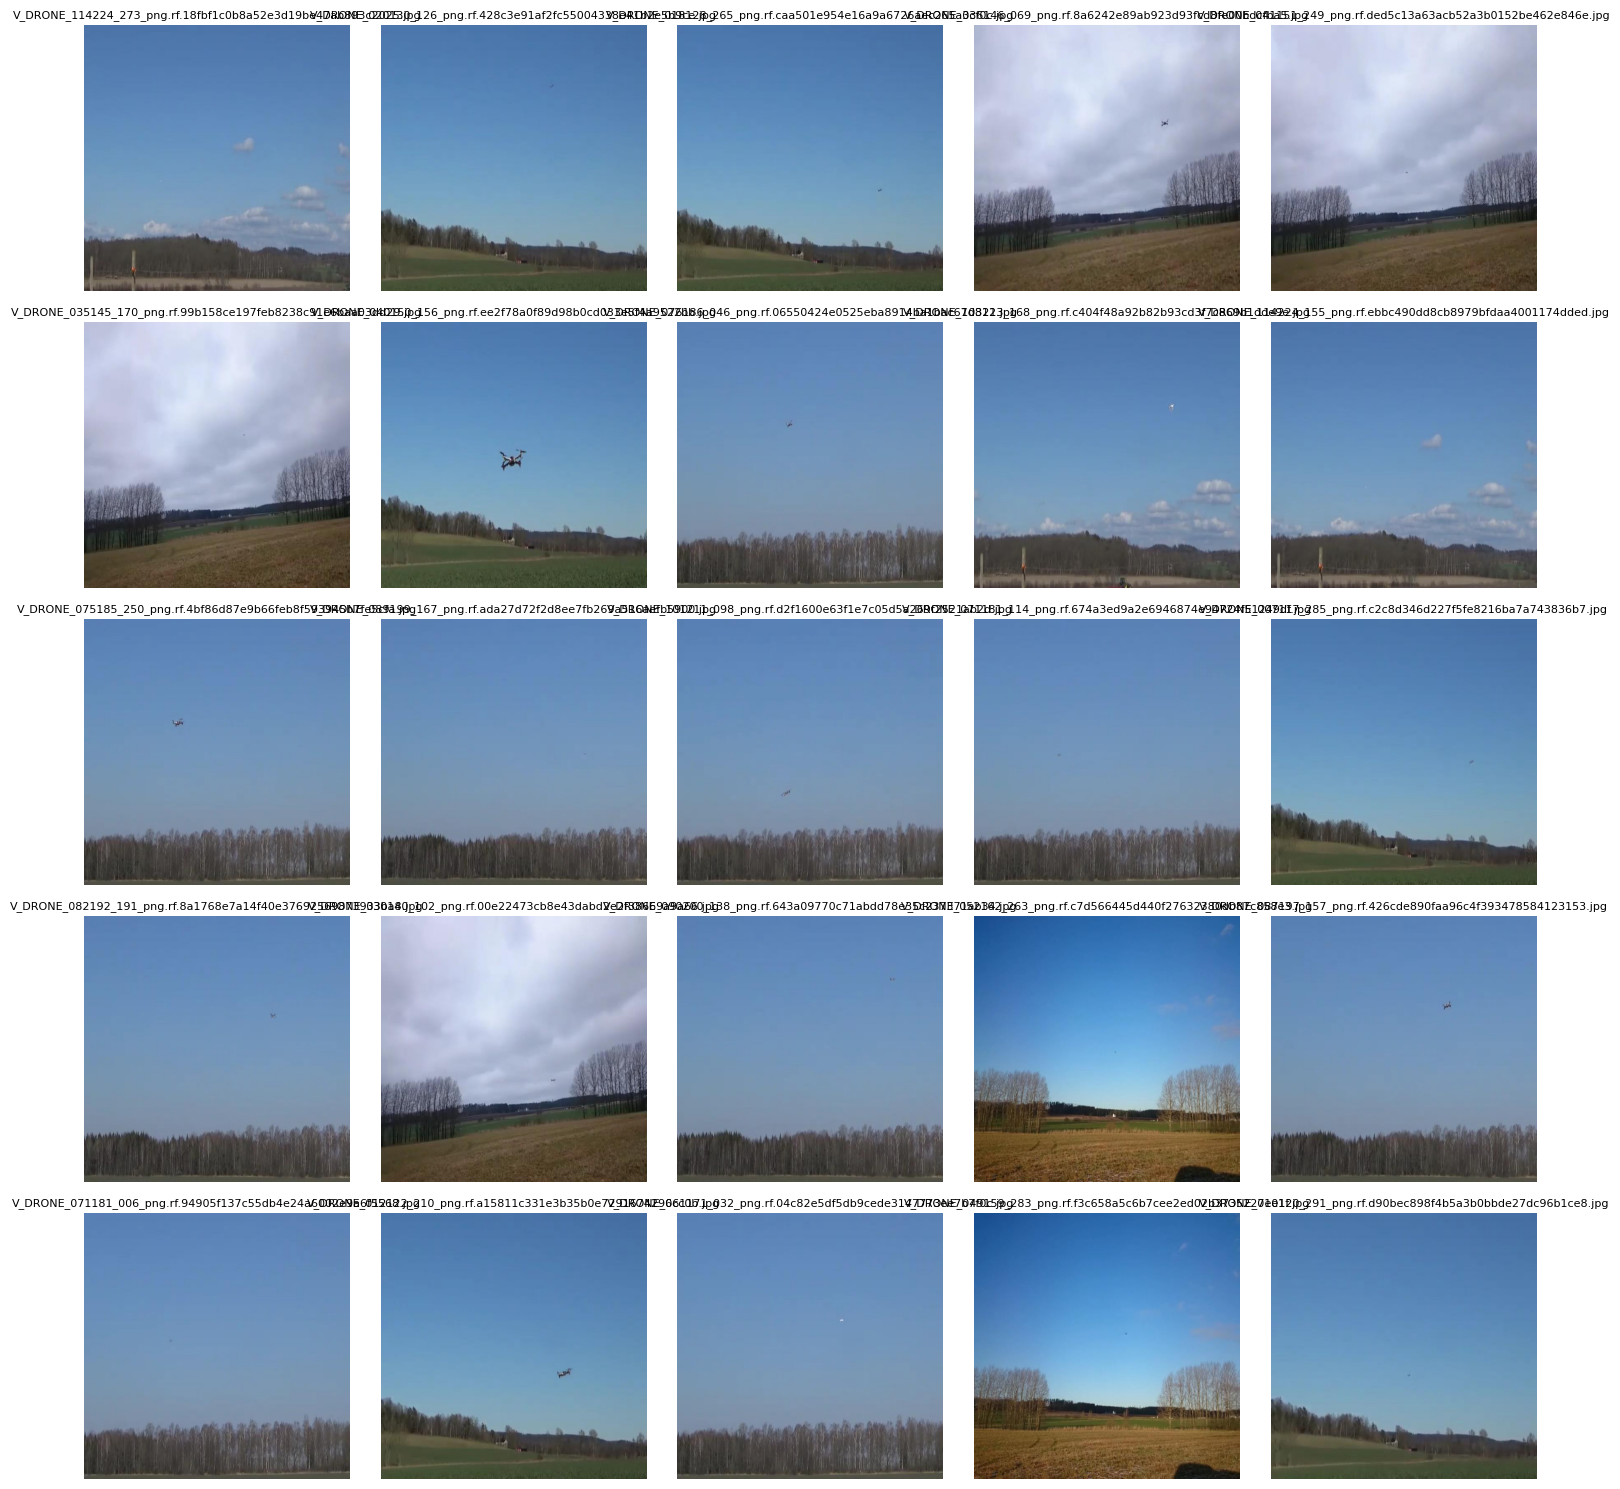

In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = "/kaggle/input/hackathon-clean-data-1/c_train/images"

# List only a limited number of files (e.g., first 100)
files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))][:100]
print(f"Displaying {len(files)} images.")

# Display images in a grid (5x5 example)
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(files):
        image_path = os.path.join(folder_path, files[i])
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(files[i], fontsize=8)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [21]:
import os
print(os.path.exists("/kaggle/input/hackathon-clean-data-1/c_train/images"))


True


In [22]:
import os

# Check the root input directory first
print(os.listdir("/kaggle/input"))

# Then check your dataset folder
folder_path = "/kaggle/input/hackathon-clean-data-1"
if os.path.exists(folder_path):
    print("Folder exists!")
    print(os.listdir(folder_path))  # List contents
else:
    print("Folder not found. Please check the path.")


['hackathon-clean-data-1', 'drone-detection']
Folder exists!
['c_train', '__results__.html', 'c_val', '__notebook__.ipynb', '__output__.json', 'custom.css']
